<a href="https://colab.research.google.com/github/toshal08/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOUNT THE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **LABARARIES**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# **LOAD DATASET**

In [6]:
df=pd.read_csv('/content/drive/MyDrive/bank-full.csv',delimiter=';')
df.rename(columns={'y':'deposit'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# **Data Overview and Info**

In [8]:
df.shape

(45211, 17)

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [22]:
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)

nul_cols=df.select_dtypes(include='number').columns
print(nul_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


# **Data Visualization**

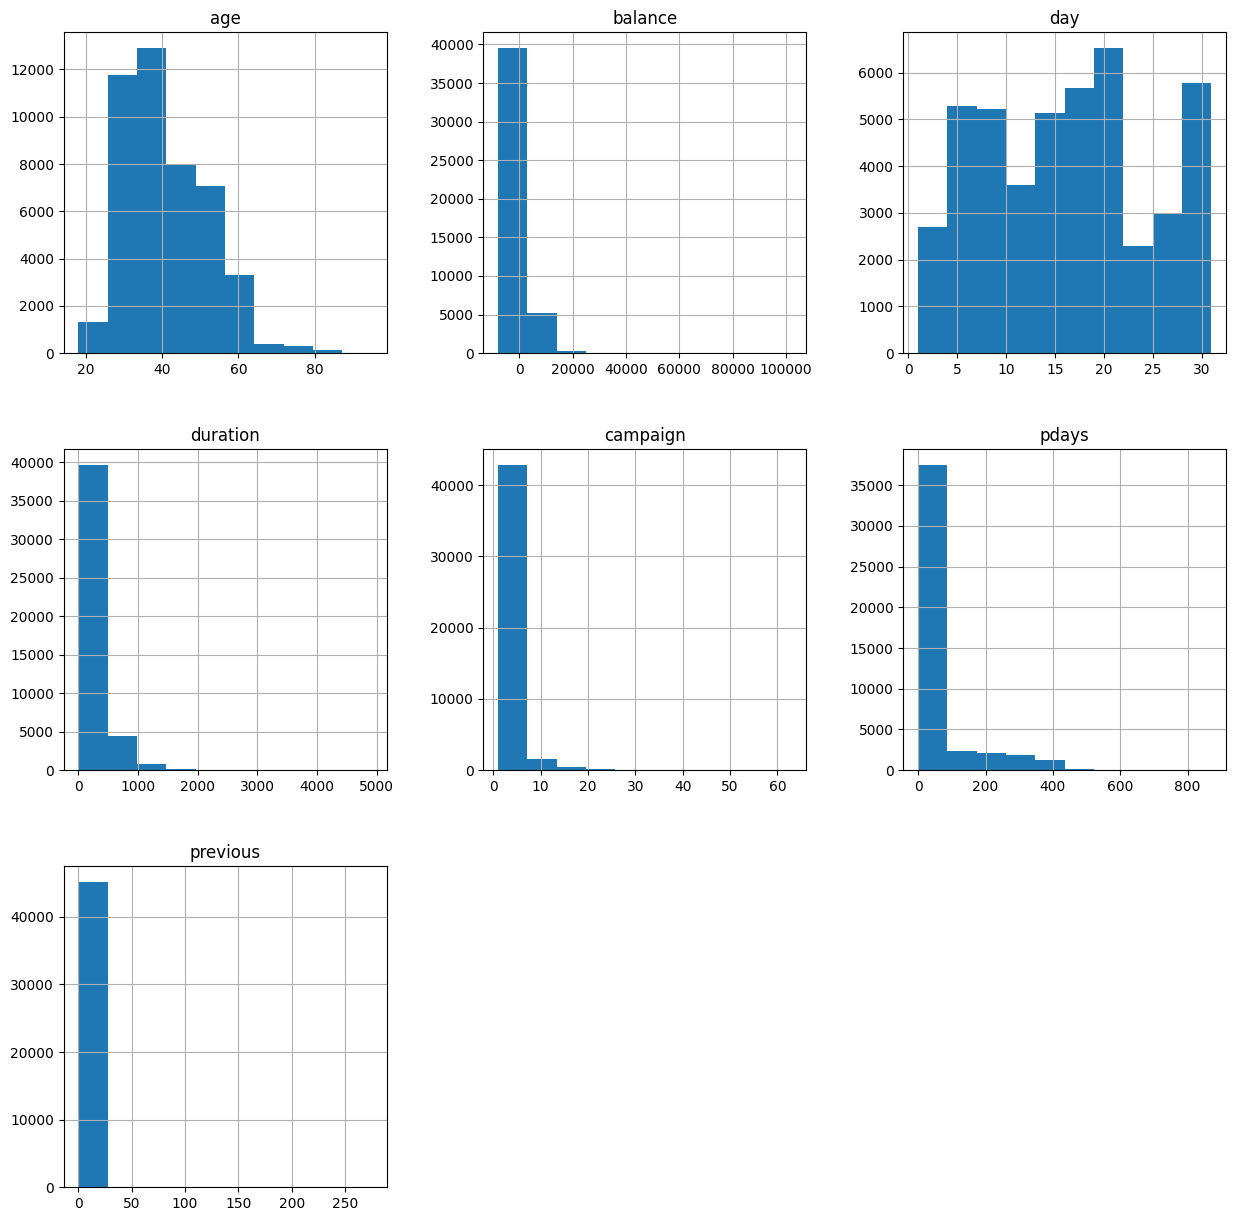

In [15]:
df.hist(figsize=(15,15))
plt.show()

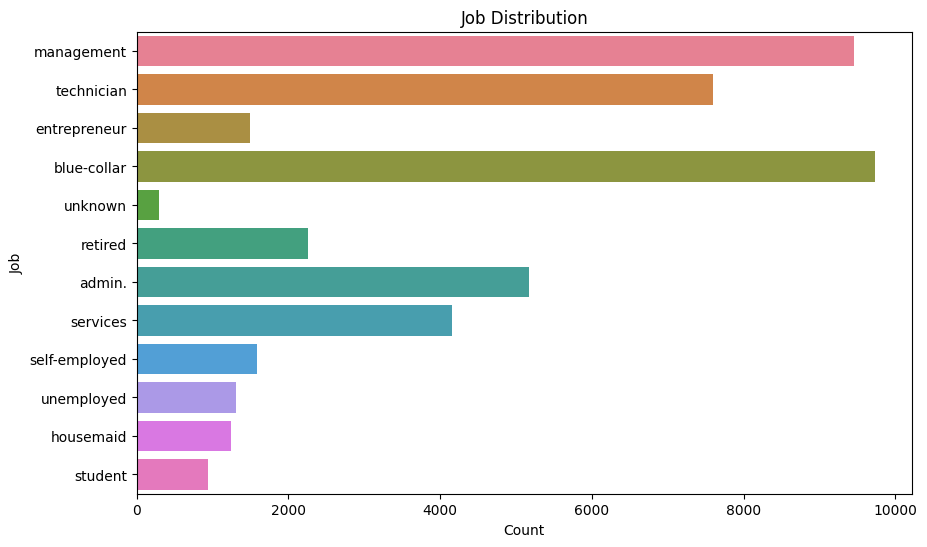

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(y='job',data=df,hue='job')
plt.xlabel('Count')
plt.ylabel('Job')
plt.title('Job Distribution')
plt.show()


/tmp/ipython-input-23-2381381852.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')
/tmp/ipython-input-23-2381381852.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')
/tmp/ipython-input-23-2381381852.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')
/tmp/ipython-input-23-2381381852.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

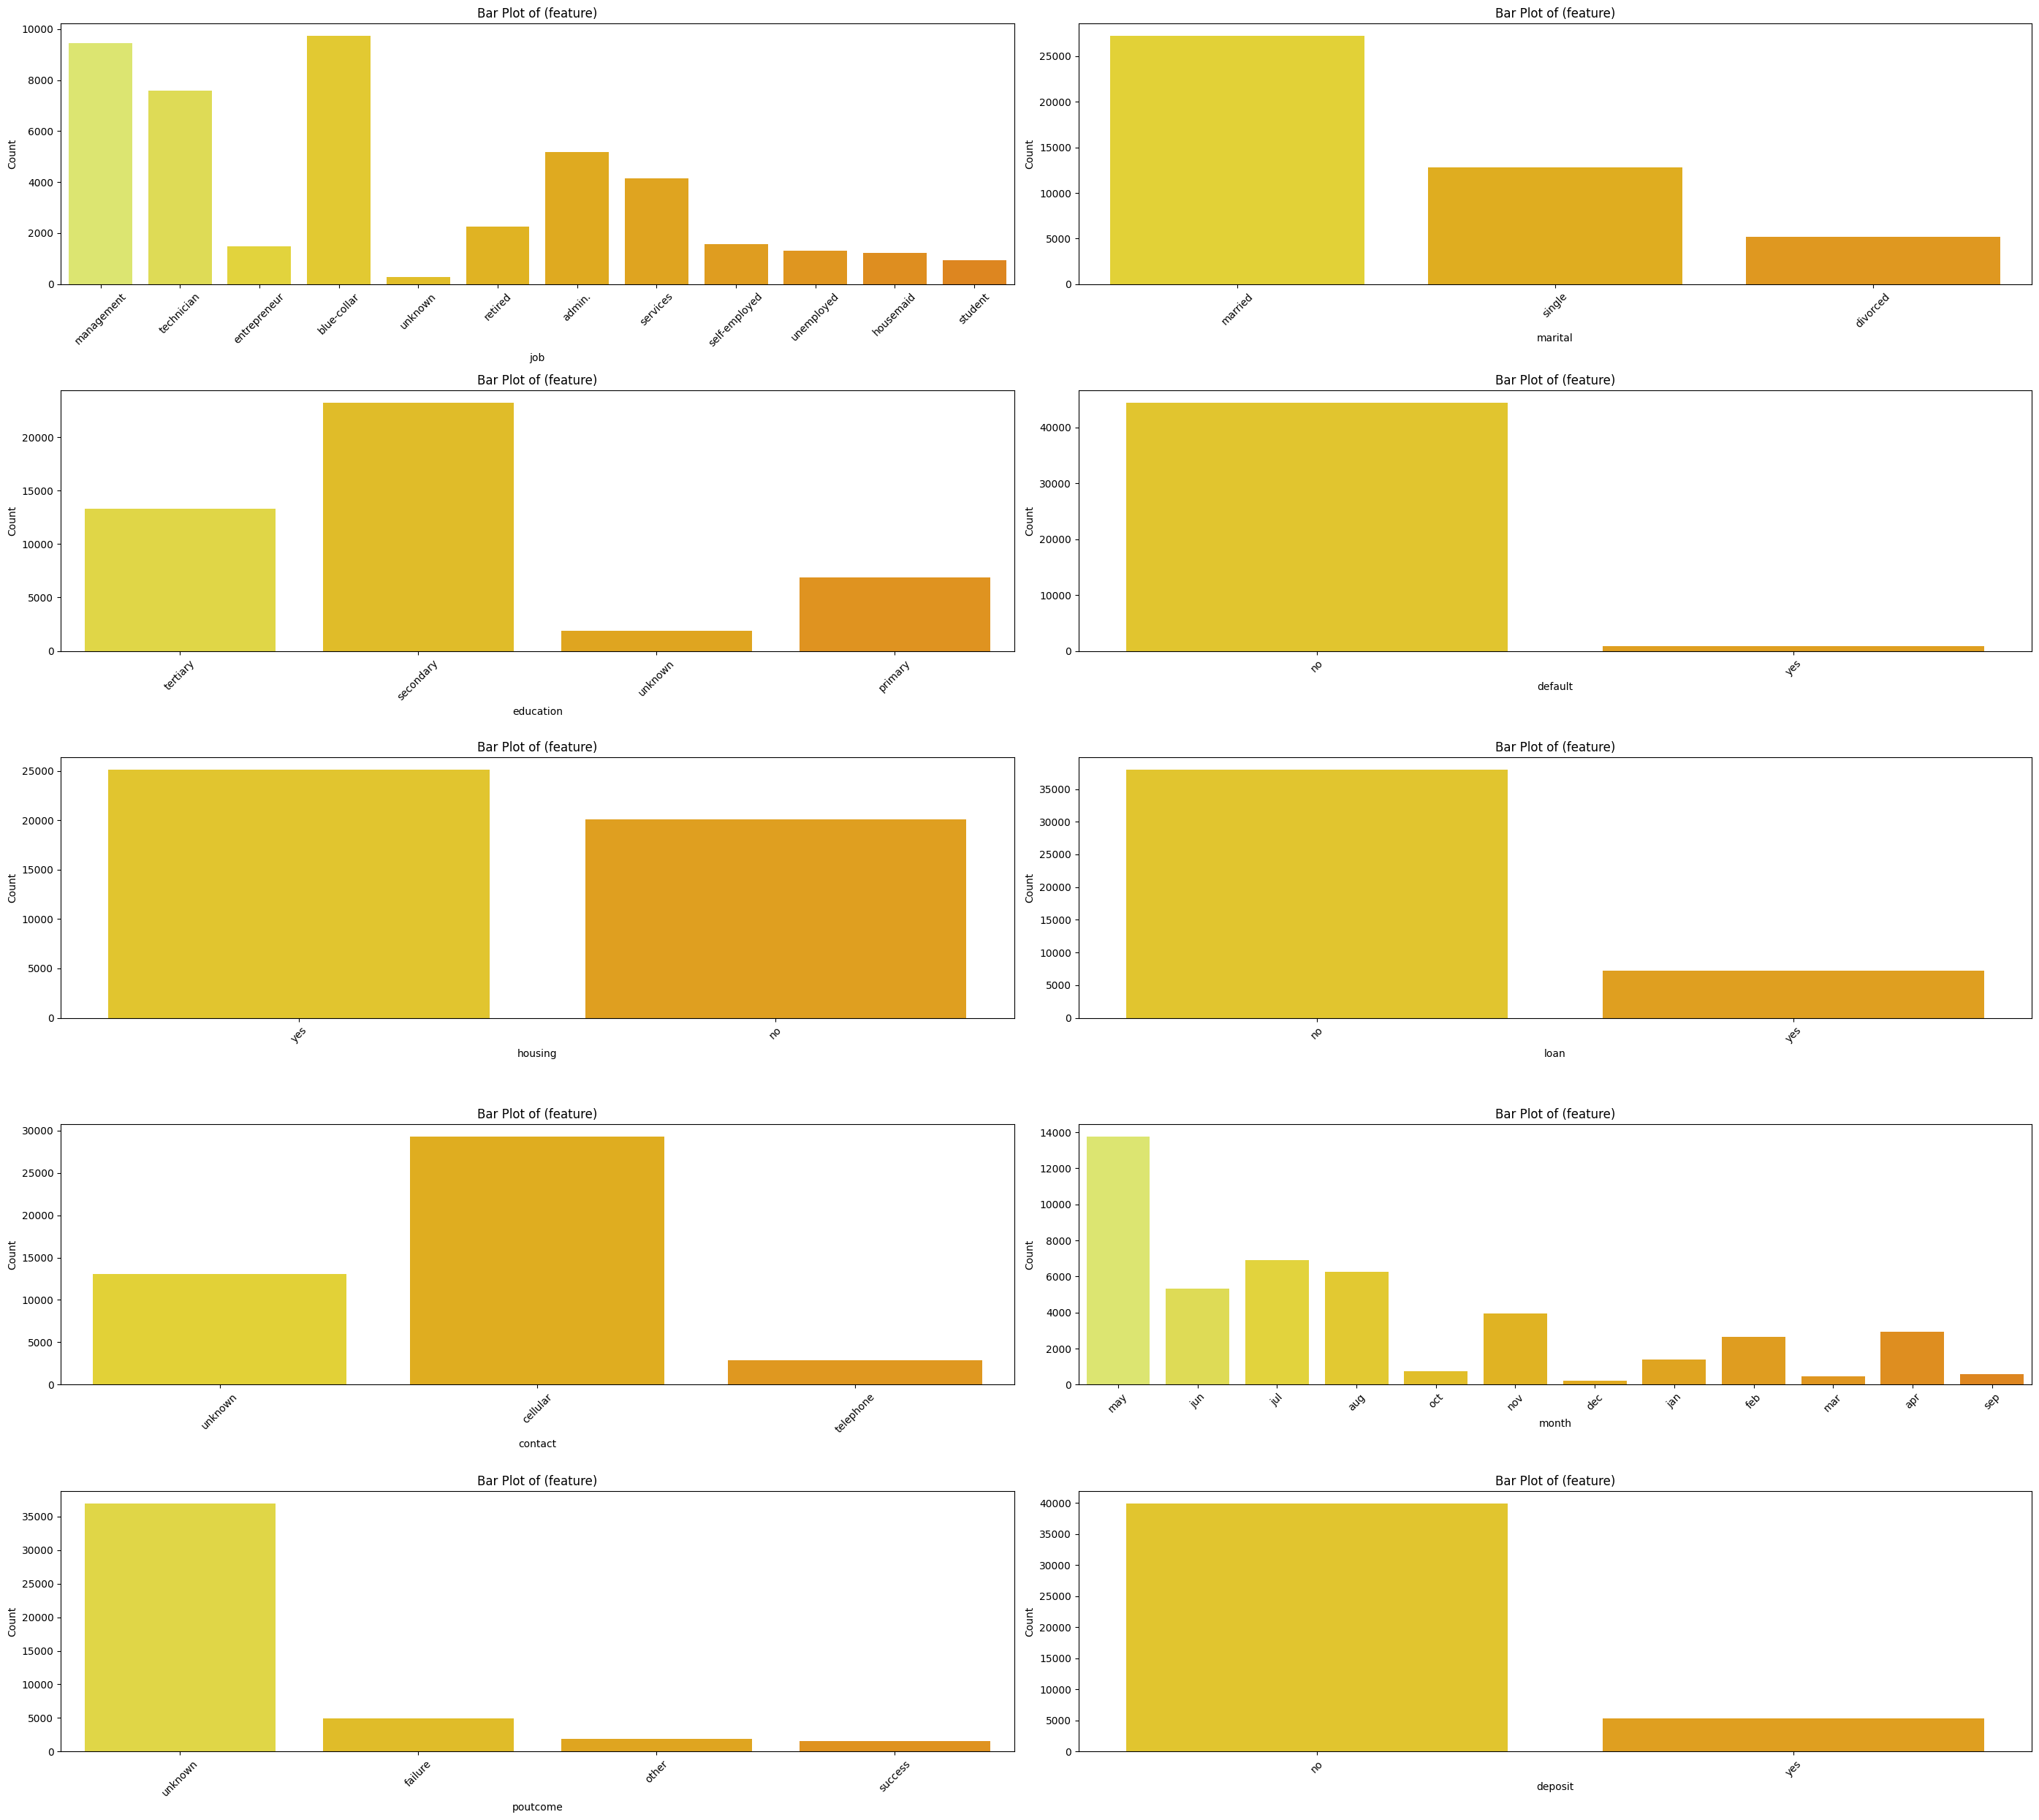

In [23]:
# calculate the number of rows and columns for subplots
num_plots=len(cat_cols)
num_rows = (num_plots + 1) // 2 # Add 1 and divide by 2 to round up for odd numbers
num_cols=2

# Create a new figure
plt.figure(figsize=(28, 25)) # Adjust the figure size as needed

#Loop through each feature and create a countplot
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of (feature)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks (rotation=45)

#Adjust Layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

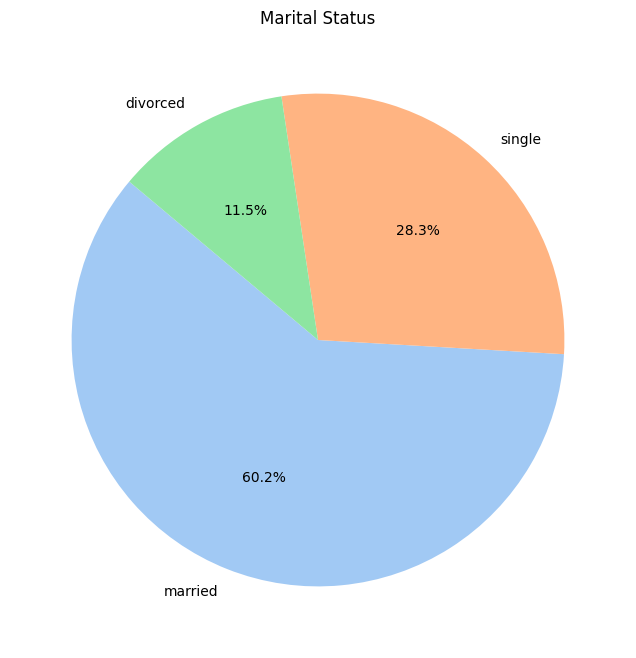

In [27]:
# pie chart
marital_counts=df['marital'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_counts,labels=marital_counts.index,autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Marital Status')
plt.show()

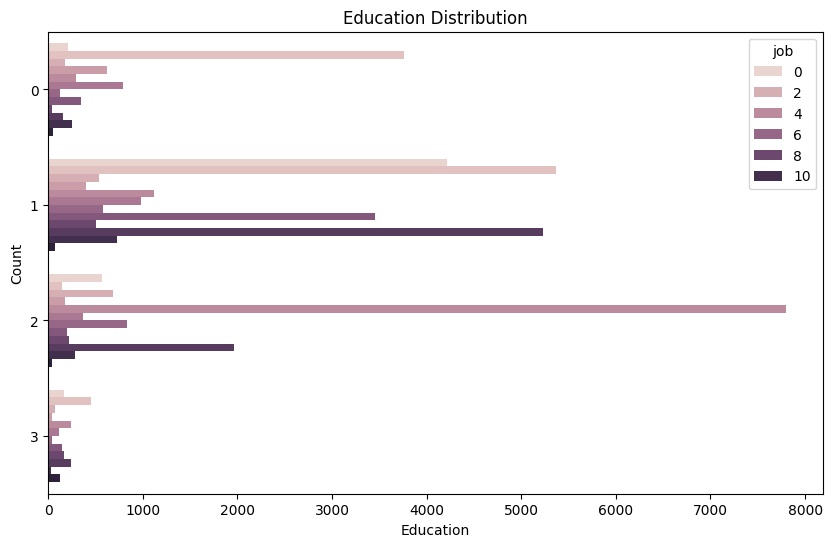

In [44]:
#education
plt.figure(figsize=(10,6))
sns.countplot(y='education',data=df,hue='job')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

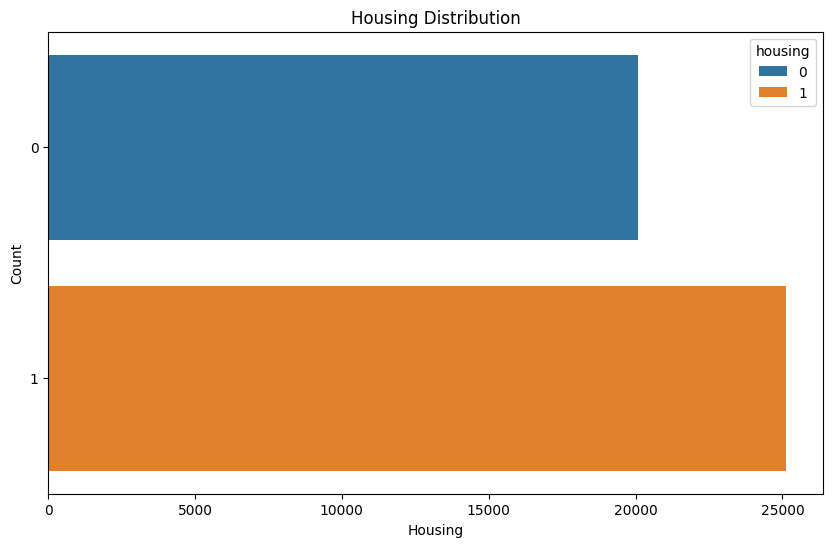

In [45]:
#housing
plt.figure(figsize=(10,6))
sns.countplot(y='housing',data=df,hue='housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Housing Distribution')
plt.show()

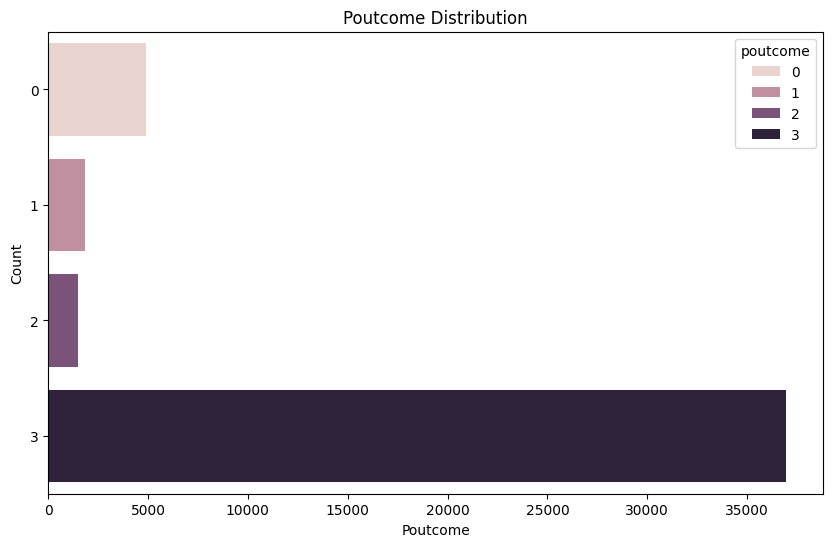

In [46]:
#poutcome
plt.figure(figsize=(10,6))
sns.countplot(y='poutcome',data=df,hue='poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.title('Poutcome Distribution')
plt.show()

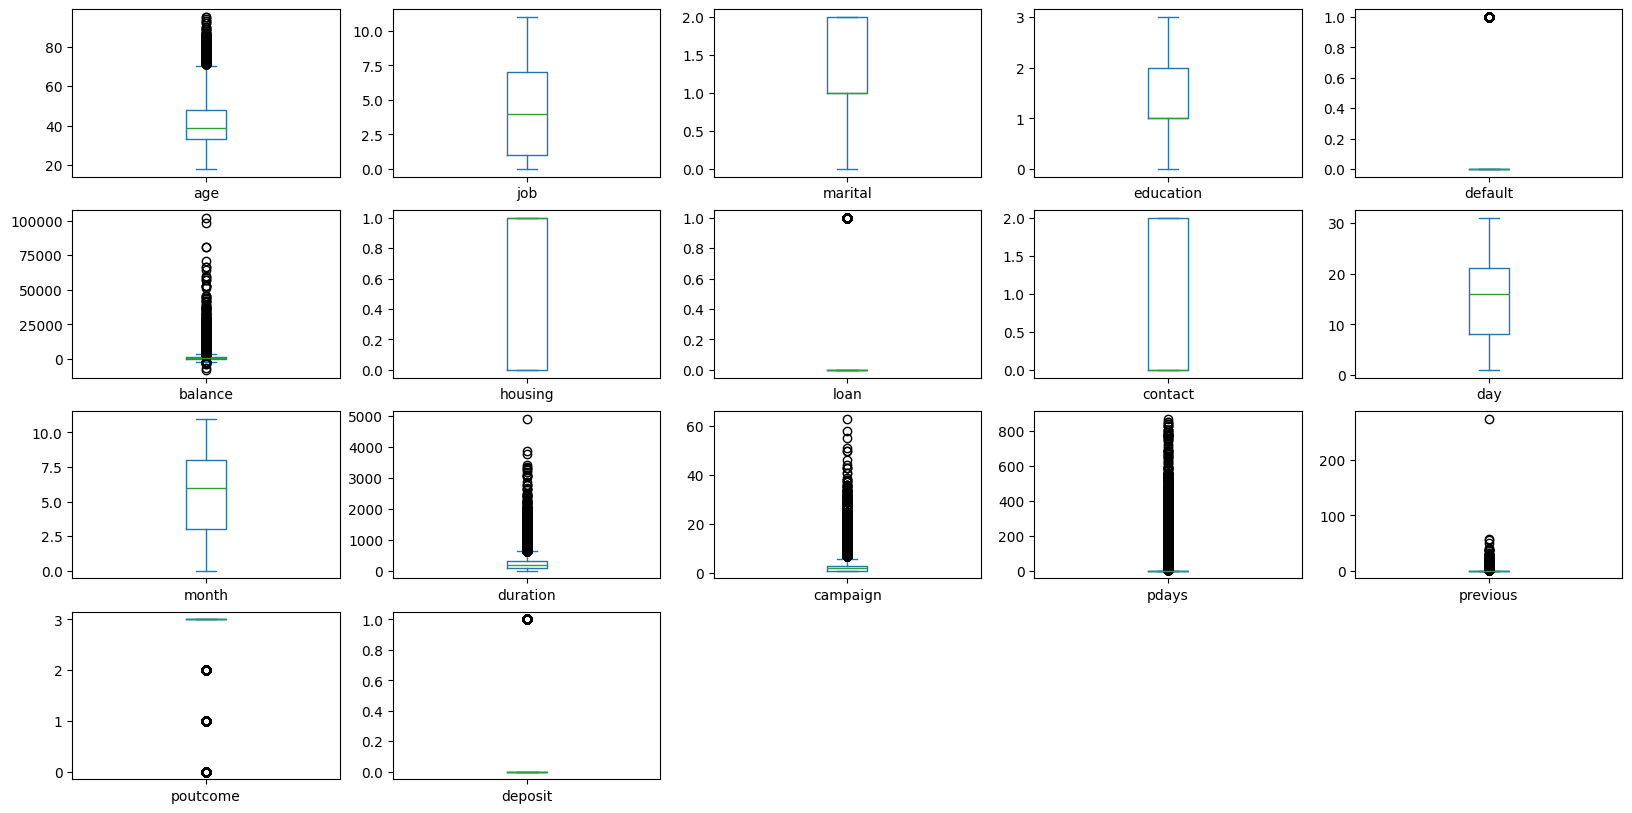

In [49]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(20,10))
plt.show()

In [53]:
# Features and Target
X = df.drop('deposit', axis=1)
y = df['deposit']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 36168
Testing samples: 9043


In [54]:
# Create model
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train model
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.8935087913303107

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



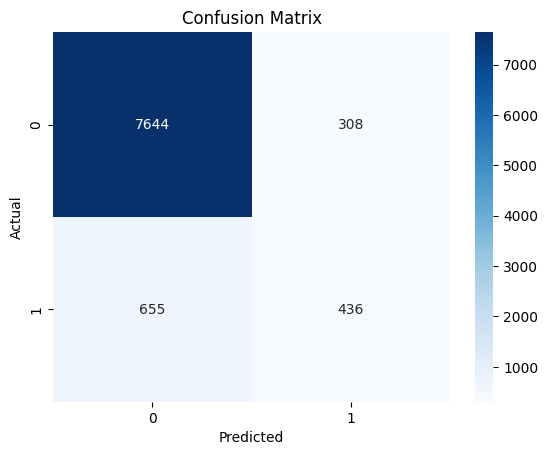

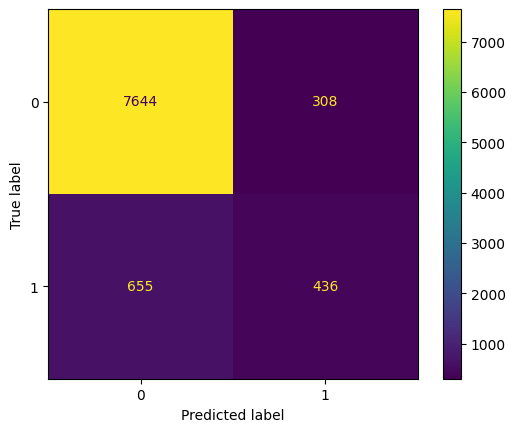

In [56]:
# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Confusion Matrix using sklearn
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


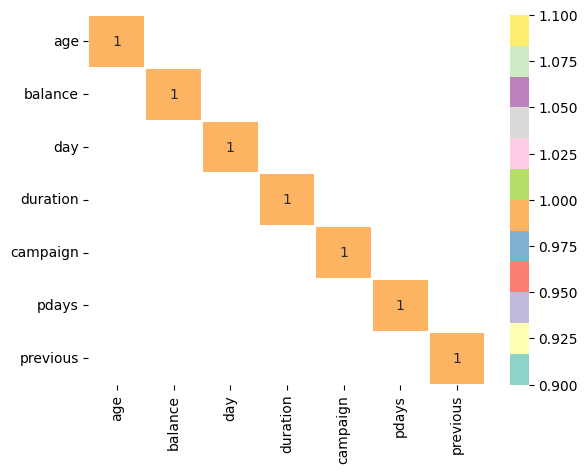

In [68]:
# Exclude non-numeric columns
numeric_df = df.drop(columns=cat_cols)

# Compute the correlation matrix
corr = numeric_df.corr()

# Print the correlation matrix
print(corr)

# Filter correlations with absolute value >= 0.90
corr = corr[abs(corr) >= 0.90]

sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [69]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [70]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [72]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [73]:
df1.shape

(45211, 17)

In [74]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [75]:
df_encoded['deposit'].value_counts()

,count
deposit,
0,39922
1,5289


In [76]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(45211, 16)
(45211,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 16)
(11303, 16)
(33908,)
(11303,)


In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [80]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [81]:
mscore(dt)

Training Score 0.8991388462899611
Testing Score 0.8957798814474034


In [82]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 1 0]


In [83]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8957798814474034
Confusion Matrix
 [[9632  366]
 [ 812  493]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      9998
           1       0.57      0.38      0.46      1305

    accuracy                           0.90     11303
   macro avg       0.75      0.67      0.70     11303
weighted avg       0.88      0.90      0.89     11303



In [84]:
from sklearn.tree import plot_tree

In [85]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


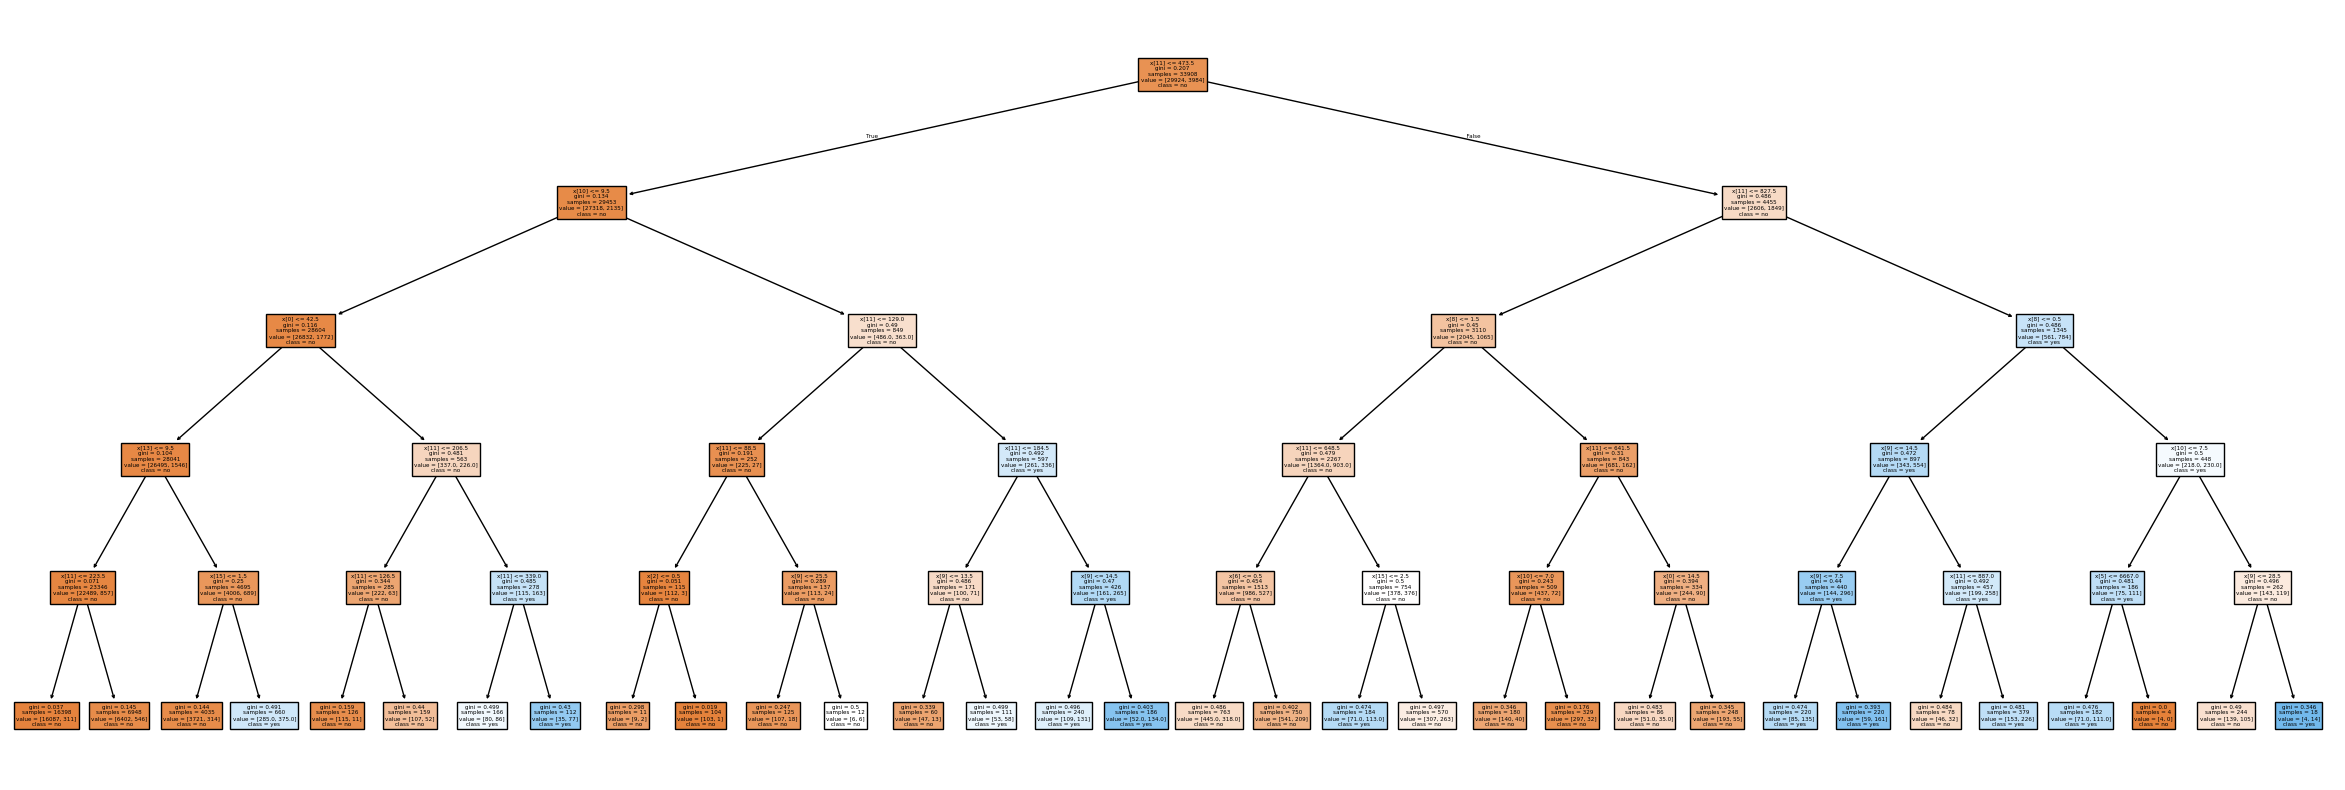

In [86]:
plt.figure(figsize=(30,10))
plot_tree(dt,class_names=cn,filled=True)
plt.show()

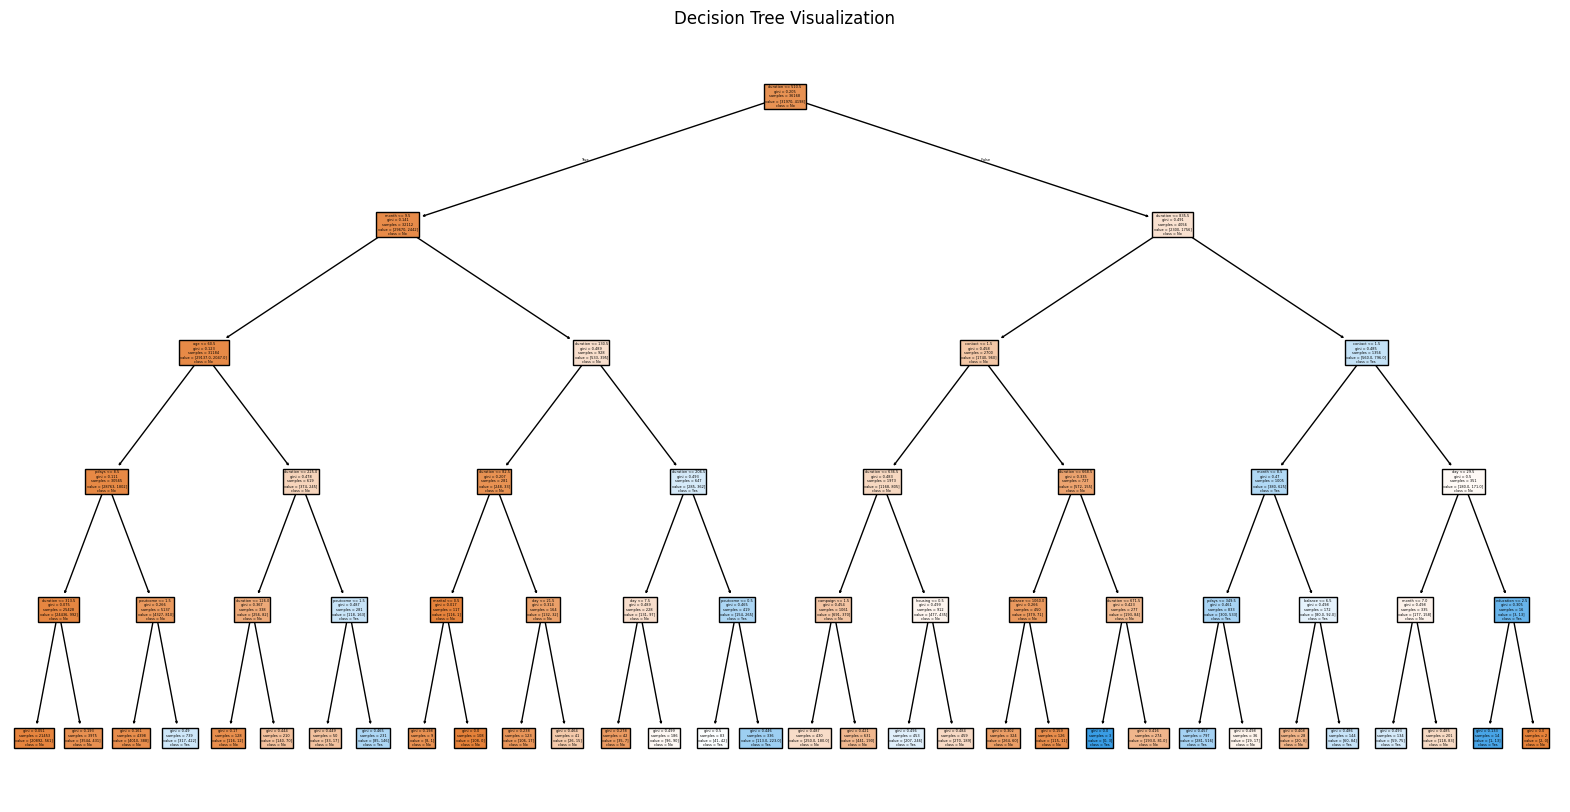

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree Visualization")
plt.show()


In [59]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [61]:
# Predict on the test set
y_pred_dt1 = dt1.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt1))

Accuracy: 0.8830034280659074

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.55      0.16      0.25      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.57      0.59      9043
weighted avg       0.85      0.88      0.85      9043



In [63]:
ypred_dt1 = dt1.predict(X_test)

In [65]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, ypred_dt1))
print("\nClassification Report:\n", classification_report(y_test, ypred_dt1))

Accuracy: 0.8830034280659074

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.55      0.16      0.25      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.57      0.59      9043
weighted avg       0.85      0.88      0.85      9043



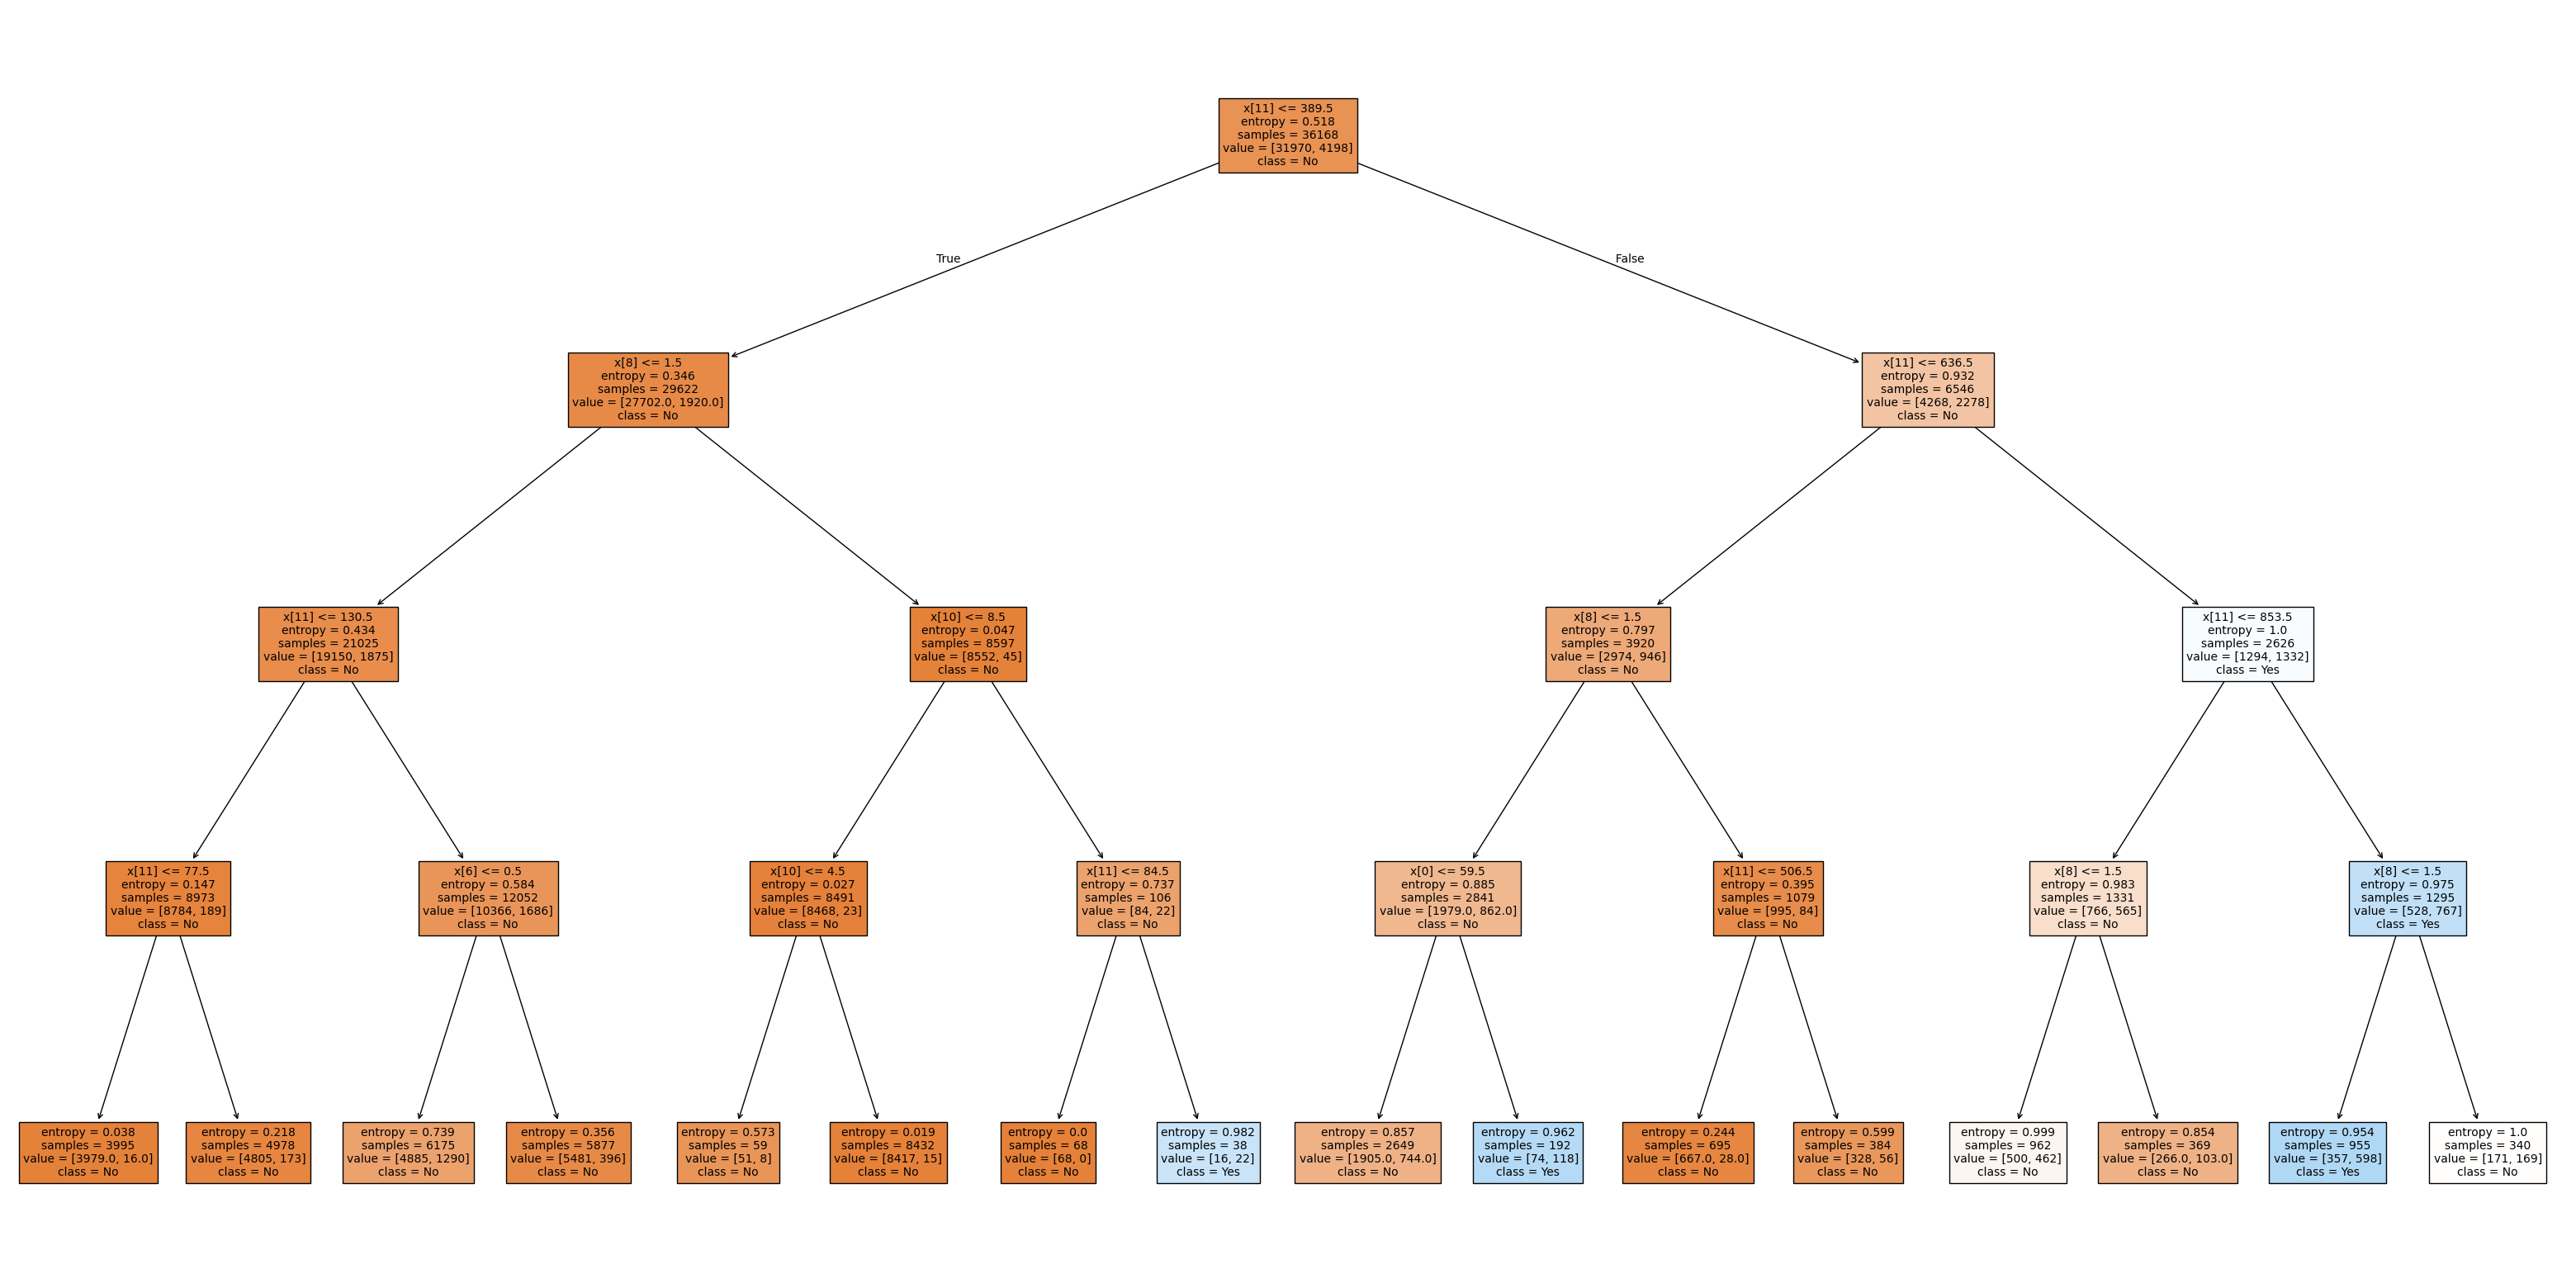

In [67]:
plt.figure(figsize=(40,20))
cn = ["No", "Yes"]
plot_tree(dt1,class_names=cn,filled=True)
plt.show()